In [ ]:
!pip install mediapipe

In [ ]:
!pip install opencv-python

In [ ]:
#MediaPipe

MediaPipe offers open source cross-platform, customizable ML solutions for live and streaming media. 
End-to-End acceleration: Built-in fast ML inference and processing accelerated even on common hardware. 
Build once, deploy anywhere: Unified solution works across Android, iOS, desktop/cloud, web and IoT.

In [ ]:
#face mesh 3d with body pose on images

In [36]:
import cv2
import numpy as np
import glob

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in glob.glob("images/*.png")}

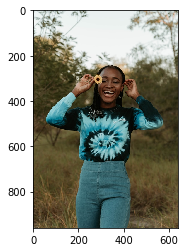

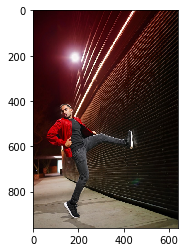

In [7]:
for name, image in images.items():
    image =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    plt.imshow(image)
    plt.show()


In [37]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic

#help(mp_holistic.Holistic)

In [38]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Nose coordinates: (338.2600784301758, 335.59764862060547)
Pose landmarks of images\image1.png:


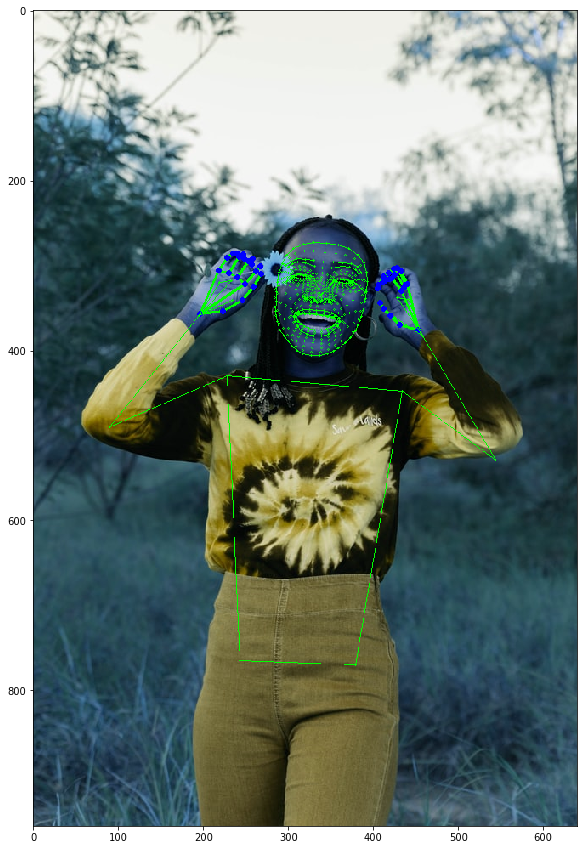

Nose coordinates: (143.75977516174316, 445.28223037719727)
Pose landmarks of images\image2.png:


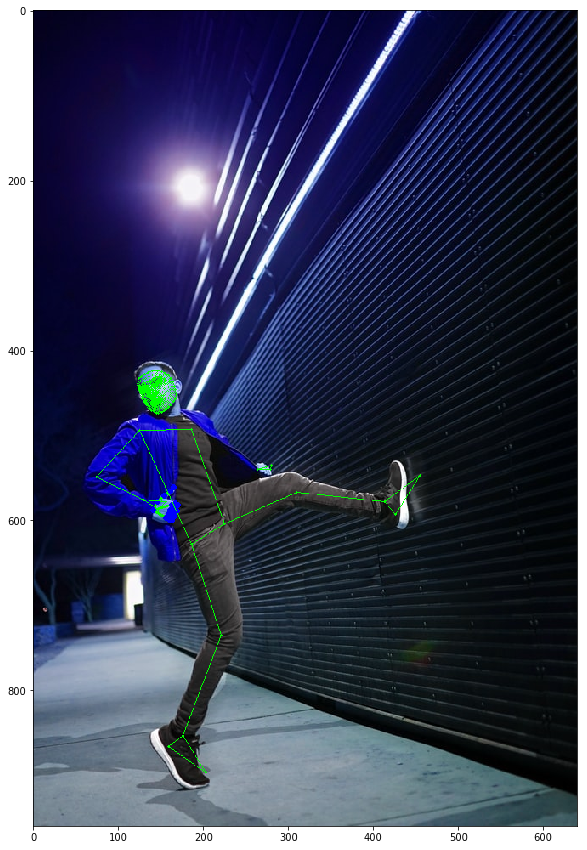

In [39]:
# Initialize MediaPipe Holistic.
with mp_holistic.Holistic(
    static_image_mode=True,min_detection_confidence=0.5) as holistic:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print nose coordinates.
    image_hight, image_width, _ = image.shape
    if results.pose_landmarks:
      print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
      )
    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.face_landmarks, 
        connections=mp_holistic.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    mp_drawing.draw_landmarks(
        image=annotated_image, 
        landmark_list=results.pose_landmarks, 
        connections=mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
    #cv2_imshow(annotated_image)
    #cv2.imwrite("imag1", annotated_image)
    plt.figure(figsize=(10,15))
    plt.imshow(annotated_image)
    plt.show()

In [41]:
#face mesh 3d on camera

In [ ]:
#MediaPipe

MediaPipe offers open source cross-platform, customizable ML solutions for live and streaming media. 
End-to-End acceleration: Built-in fast ML inference and processing accelerated even on common hardware. 
Build once, deploy anywhere: Unified solution works across Android, iOS, desktop/cloud, web and IoT.

In [ ]:
!pip install mediapipe

In [ ]:
!pip install opencv-python

In [ ]:
Face Mesh 468 point 3D face landmarks in video even on mobile devices and web application MediaPipe

In [ ]:
#camera

In [34]:

#face mesh 3d

#video
import mediapipe as mp
import cv2

mp_face_mesh = mp.solutions.face_mesh
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
#drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(80,110,10))
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))

#path_video ="images/videoplayback.mp4"
cap=cv2.VideoCapture(0)
#cap =cv2.VideoCapture(path_video)

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=3,
    min_detection_confidence=0.5) as face_mesh:
    while True:
        ret, image=cap.read()
          
        if ret:
            results = face_mesh.process(image)
        
            if results.multi_face_landmarks:
                
                for face_landmarks in results.multi_face_landmarks:
                    
                    mp_drawing.draw_landmarks(
                      image=image,
                      landmark_list=face_landmarks,
                      connections=mp_face_mesh.FACE_CONNECTIONS,
                      landmark_drawing_spec=drawing_spec,
                      connection_drawing_spec=drawing_spec)
              
            cv2.imshow("annotated_image", image)
        
            if cv2.waitKey(5) & 0xFF == 27:
                break
        else:
            break
        
cap.release()
cv2.destroyAllWindows()




In [ ]:
#image manipulation

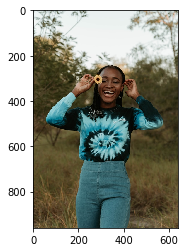

In [13]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("images/image1.png")
gray =cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#Show the image with matplotlib
plt.imshow(gray)
plt.show()

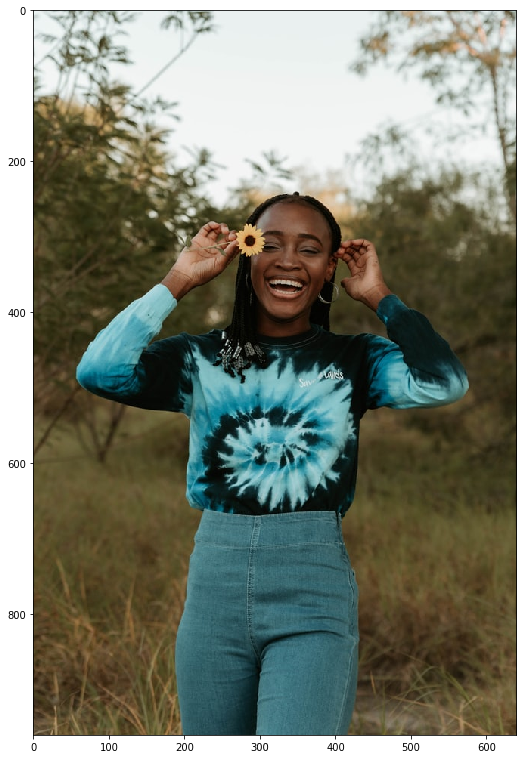

In [4]:
import cv2
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

# Acquire default dots per inch value of matplotlib
dpi = matplotlib.rcParams['figure.dpi']

img = cv2.imread("images/image1.png")
img =cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Determine the figures size in inches to fit your image
height, width, depth = img.shape
figsize = width / float(dpi), height / float(dpi)

plt.figure(figsize=figsize)
plt.imshow(img)
plt.show()

In [19]:
figsize

(8.88888888888889, 13.333333333333334)